In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from keras.preprocessing.sequence import pad_sequences


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_400.csv',delimiter=',',encoding='latin-1')
df.head()

,sentence,class
0,Part of the ideas and concepts behind econnect...,research and development or research
1,The electric vehicle tested was also fitted wi...,research and development or research
2,The number of electric vehicles is sky-rocketi...,research and development or research
3,Etrel's research & development department is f...,research and development or research
4,Link: http://dx.doi.org/10.1021/cm501482hlow-t...,research and development or research


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

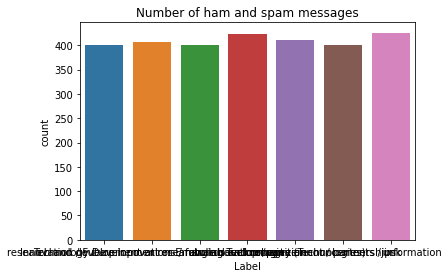

In [ ]:
sns.countplot(df['class'])
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [ ]:
df['sentence'] = df['sentence'].astype('str') 
df['class'] = df['class'].astype('str') 

In [ ]:
space = re.compile('[/(){}\[\]\|@,;]')
symbols= re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = space.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = symbols.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

In [ ]:
df['sentence']=df['sentence'].apply(clean_text)


In [ ]:
df["sentence"]

0       part ideas concepts behind econnect cars prove...
1       electric vehicle tested also fitted alke sev g...
2       number electric vehicles skyrocketing epected ...
3       etrels research development department focused...
4       link http ddoiorg 101021 cm501482hlowtemperatu...
                              ...                        
2928                                                  nan
2929                                                  nan
2930                                                  nan
2931                                                  nan
2932                                                  nan
Name: sentence, Length: 2933, dtype: object

In [ ]:
g=[]
for i in df['sentence']:
    g.append(i)

In [ ]:
len(g)


2933

In [ ]:
maxl = max([len(s) for s in g])
print ('Maximum sequence length in the list of sentences:', maxl)

Maximum sequence length in the list of sentences: 1488


In [ ]:
tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['sentence'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 15417 unique tokens.


In [ ]:
maxl

1488

In [ ]:
X = tokenizer.texts_to_sequences(df['sentence'].values)


In [ ]:
X = pad_sequences(X, maxlen=3000)

In [ ]:
from keras.utils import to_categorical
one_hot_label = to_cateorical(input_labels)

In [ ]:
Y = pd.get_dummies(df['class'],columns=df["class"]).values
Y

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [ ]:
len(Y)


8

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2053, 3000) (2053, 8)
(880, 3000) (880, 8)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D


In [ ]:
model=Sequential()
model.add(Embedding(50000,100,input_length=3000))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 3000, 100)         5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 3000, 100)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 808       
Total params: 5,081,208
Trainable params: 5,081,208
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=7, batch_size=64,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/7
29/29 [==============================] - 278s 10s/step - loss: 2.0573 - accuracy: 0.1672 - val_loss: 1.9034 - val_accuracy: 0.2087
Epoch 2/7
29/29 [==============================] - 276s 10s/step - loss: 1.8843 - accuracy: 0.2472 - val_loss: 1.7965 - val_accuracy: 0.2718
Epoch 3/7
29/29 [==============================] - 278s 10s/step - loss: 1.6300 - accuracy: 0.3957 - val_loss: 1.5633 - val_accuracy: 0.3738
Epoch 4/7
29/29 [==============================] - 278s 10s/step - loss: 1.2977 - accuracy: 0.5895 - val_loss: 1.4566 - val_accuracy: 0.4272
Epoch 5/7
29/29 [==============================] - 277s 10s/step - loss: 0.8332 - accuracy: 0.7364 - val_loss: 1.4333 - val_accuracy: 0.4951
Epoch 6/7
29/29 [==============================] - 277s 10s/step - loss: 0.4566 - accuracy: 0.8977 - val_loss: 1.5225 - val_accuracy: 0.4806
Epoch 7/7
29/29 [==============================] - 277s 10s/step - loss: 0.2334 - accuracy: 0.9525 - val_loss: 1.6380 - val_accuracy: 0.5049


In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

28/28 [==============================] - 14s 514ms/step - loss: 1.5366 - accuracy: 0.5170
Test set
  Loss: 1.537
  Accuracy: 0.517


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Y_test, y_pred))


Classification Report



NameError: ignored

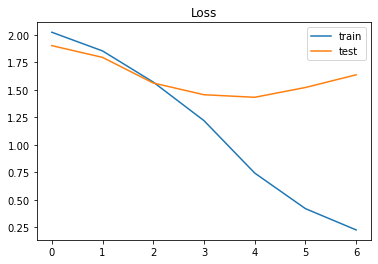

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

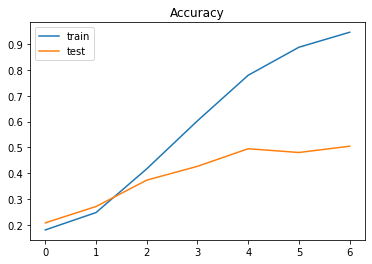

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
new_complaint = ["Tesla's research and development spending increased to almost 1.5 billion U.S. dollars in 2020. The intensity of investment in recent years has made Tesla the leading electric vehicle manufacturer in the United States. Globally, the company sold just under half a million vehicles in 2020."]
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=3000)
pred = model.predict(padded)
labels = ['award','coll','com ann','inn','junk','r&d','tech']
print(pred, labels[np.argmax(pred)])

[[1.0492783e-02 7.3072606e-01 6.2066619e-03 1.3311628e-02 1.1131989e-01
  2.3346920e-03 3.1389834e-04 1.2529436e-01]] coll


In [ ]:
model.predict(Y_test)

0.65123093